# Assignment on finding the Countries in need of Aid.

## We will perform some of the basic sanitory checks on the data set, and then step by step we will proceed further.

### The following steps are related to the EDA that we will be performing to gain an insight as what countries we may get, so let's get AMAZED!

1. Importing Libraries
2. Read the data and perform null values checking.
3. Perform some basic informative functions like SHAPE/INFO/DESCRIBE, in order to get the feeling of the data.
4. Perform the Outlier Analysis and see the impact of removing/not removing the outlier on our data set.
5. Visualize the data set to get some more insights.

In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [317]:
countries = pd.read_csv('Country-data.csv')
countries.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


### Please Note:
1. We don't need any Dummy variable or Label Encoder as the variables are already numerical.
2. Next we can create a metric of "Income per GDP Capita", but it is not required as we already have a heavy GDP metric

In [318]:
countries.isnull().sum()
# So we have a clean data set, which is free of any NaN values.

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [319]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [320]:
countries.describe()
# We get to see that factors such as health/inflation/total_fer are very low, where as the other factors have mean very high.
## This justifies our need of scaling the data.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [321]:
# Let's check the unique values for Countries
print(countries.country.value_counts())
# We get to know that none of the Country is duplicated.
print('--------==============----------')
# Let's find the count in that case then.
print("Total Unique Countries: " , countries.country.nunique())

Chile                     1
Malta                     1
Malaysia                  1
Lebanon                   1
Peru                      1
Cape Verde                1
New Zealand               1
Luxembourg                1
Jordan                    1
Philippines               1
Bosnia and Herzegovina    1
Botswana                  1
Antigua and Barbuda       1
Uganda                    1
Israel                    1
Croatia                   1
Belarus                   1
Eritrea                   1
Guinea-Bissau             1
Libya                     1
Hungary                   1
Finland                   1
Mozambique                1
United Arab Emirates      1
Dominican Republic        1
Belize                    1
Argentina                 1
Mauritius                 1
Myanmar                   1
Samoa                     1
                         ..
Fiji                      1
Uruguay                   1
Nepal                     1
Serbia                    1
Cambodia            

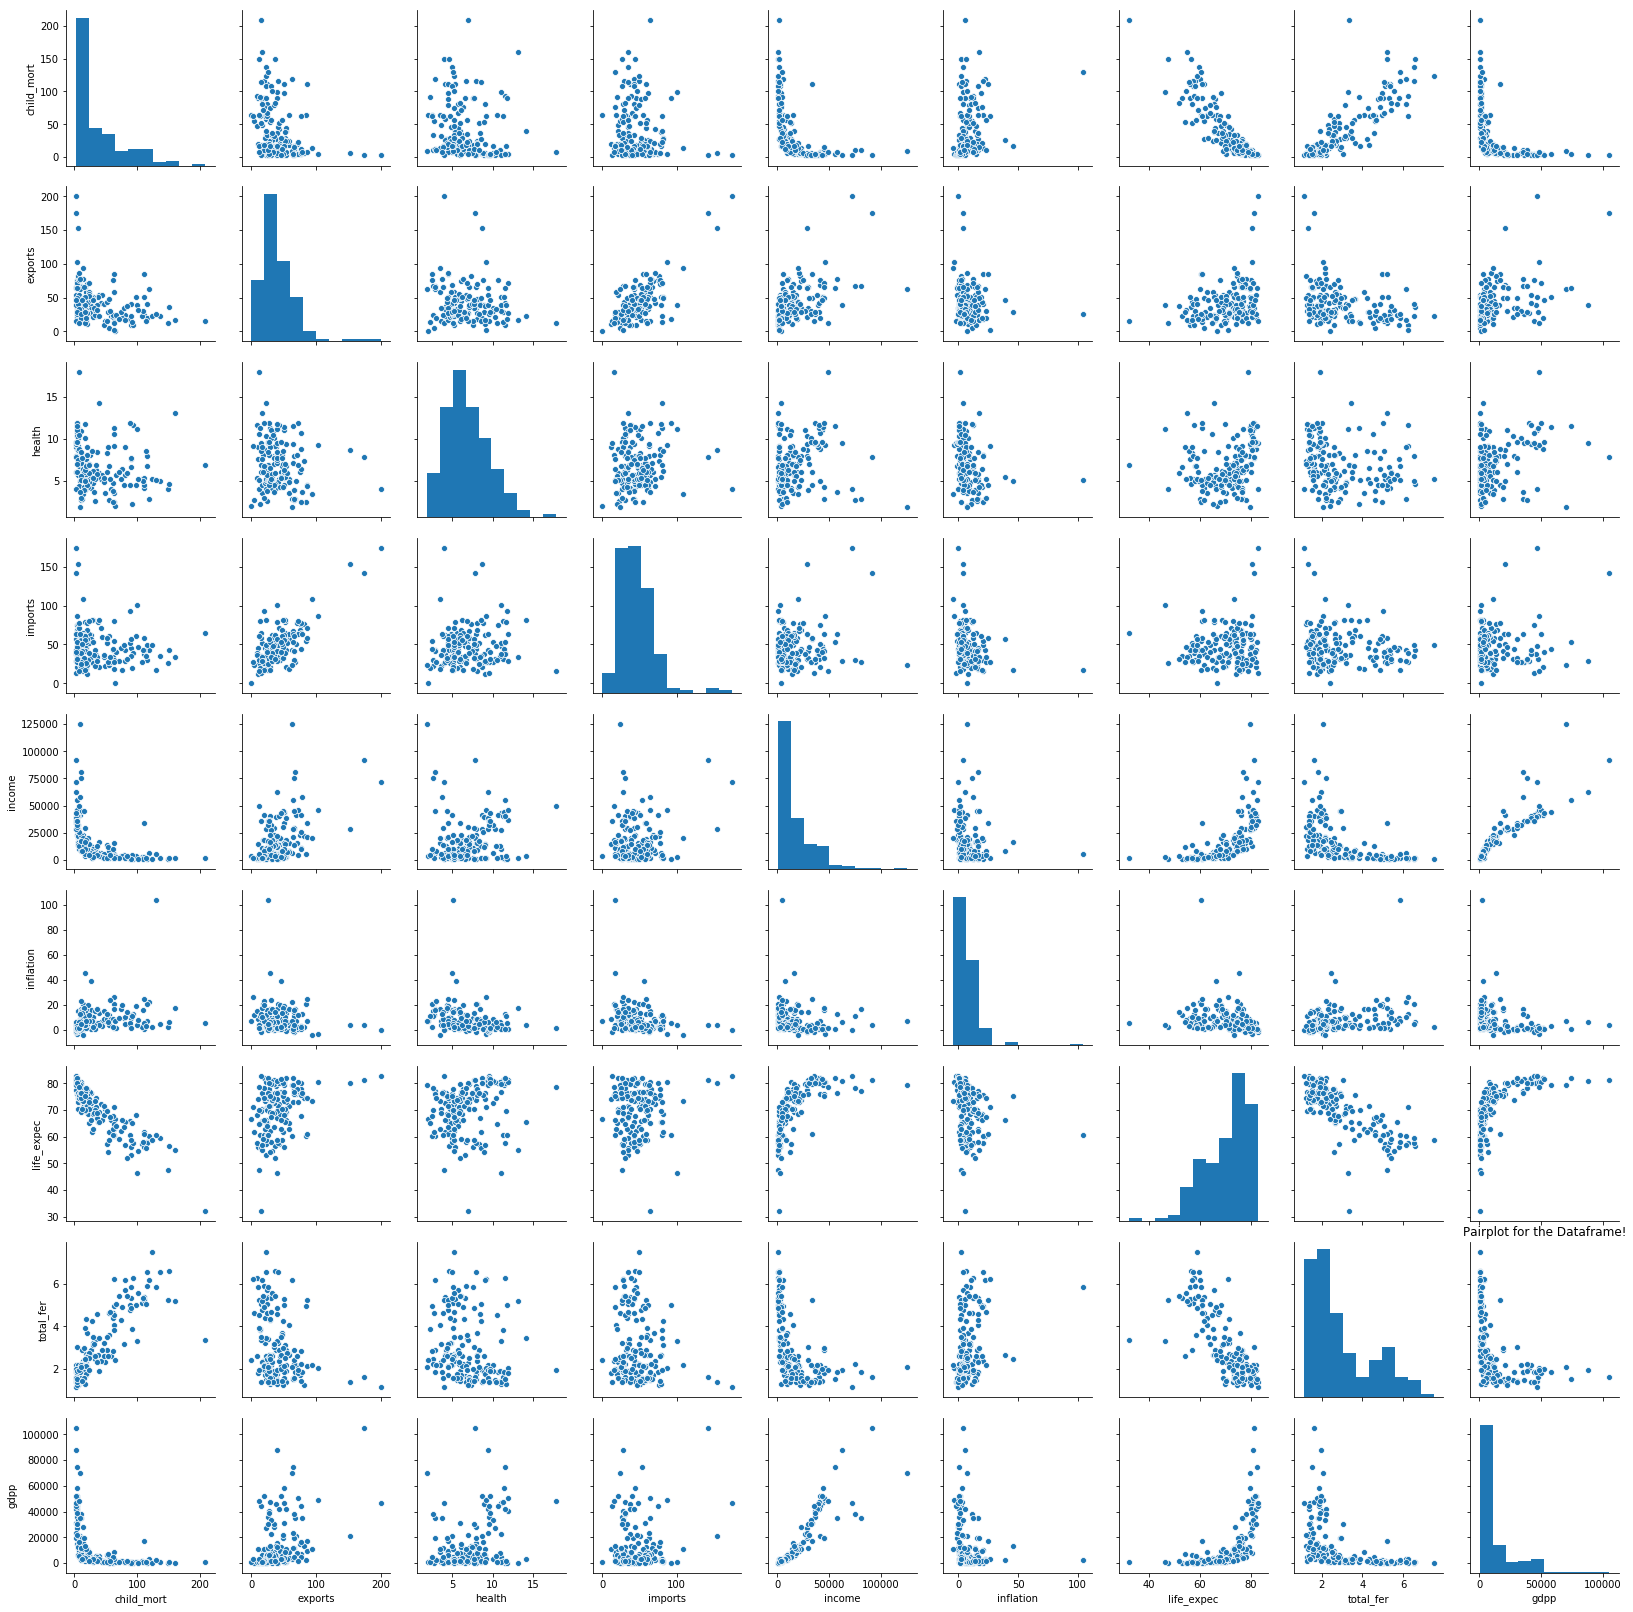

In [322]:
# Let's see the pairplot which will tell us the Linear Relationship between variables, if any!
sns.pairplot(countries);
plt.title('Pairplot for the Dataframe!');
plt.savefig('Pairplot_for_the_DataSet.png')

In [323]:
# Now we will try to visualize the outliers for the data set.
cols = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

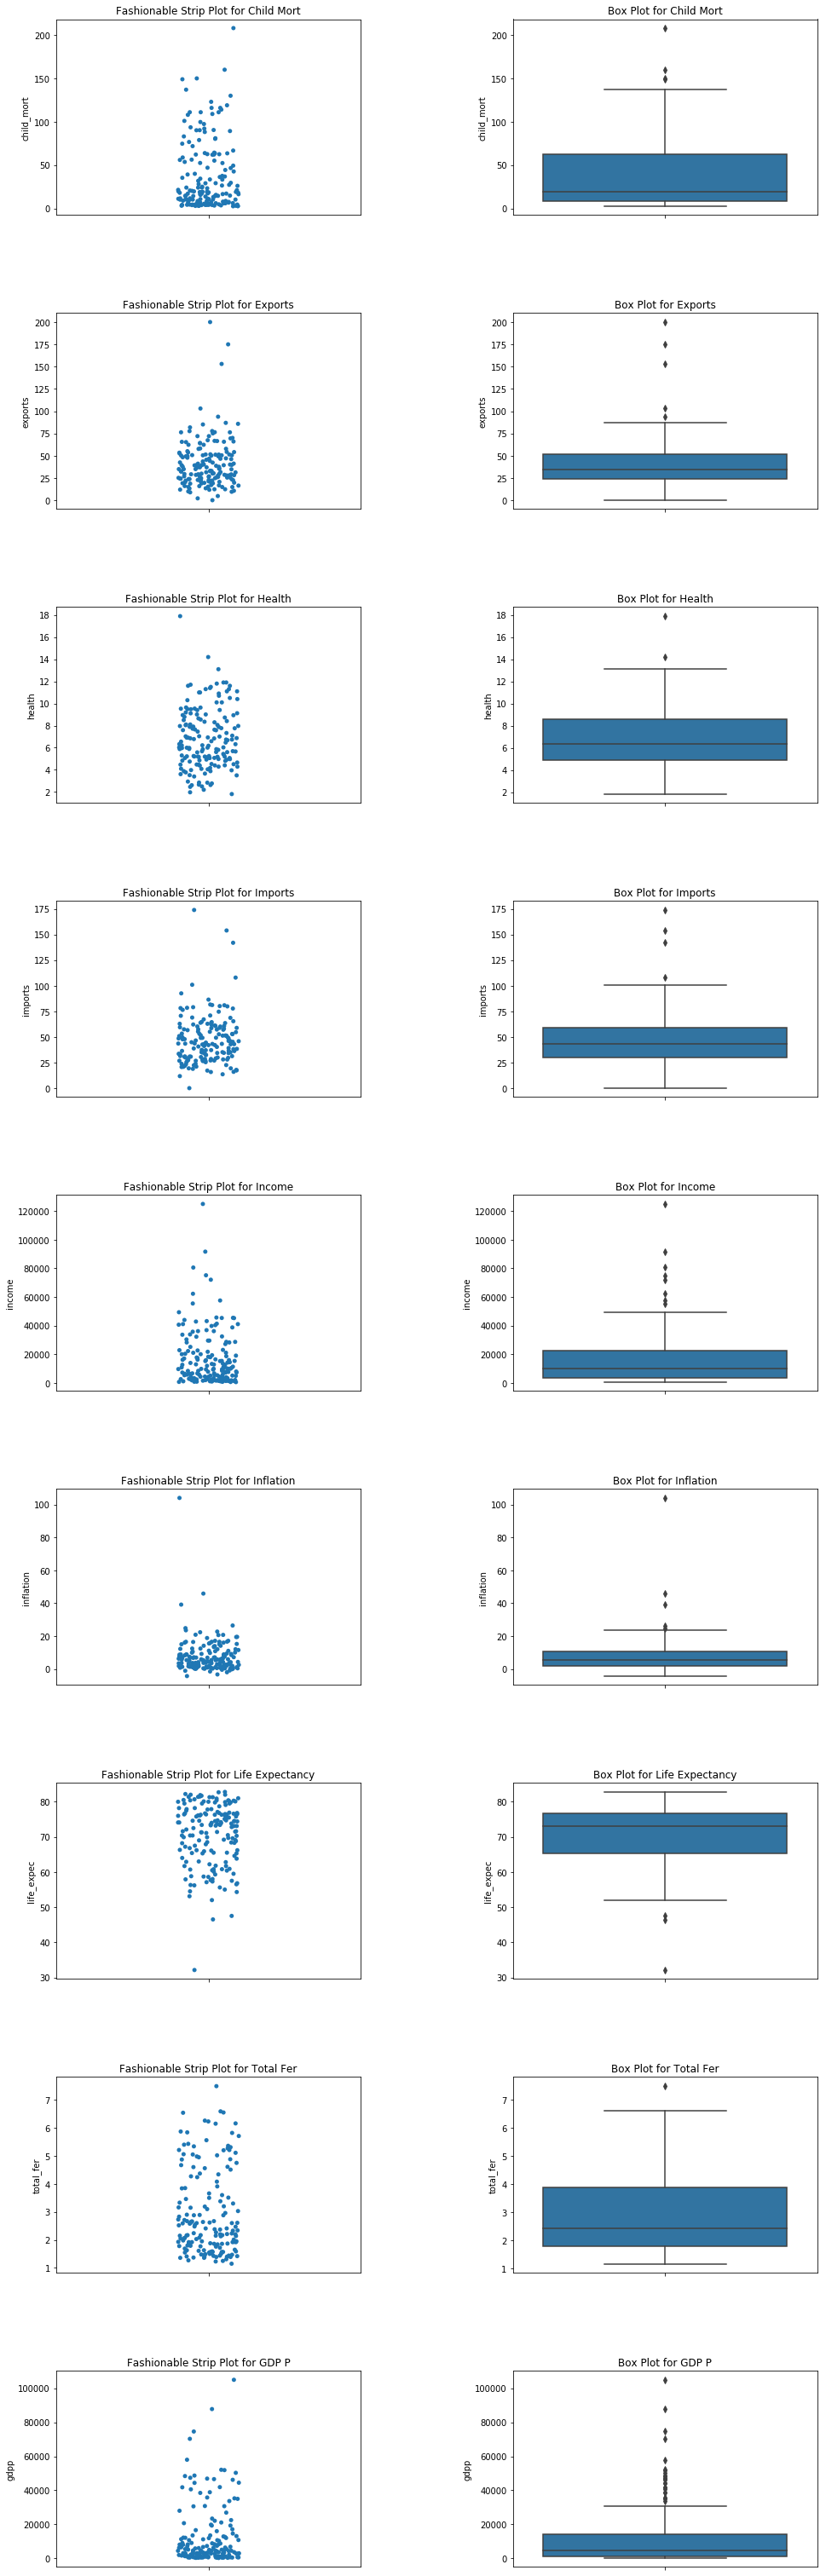

In [324]:
# Outlier Checking for Multiple variables
plt.figure(figsize=(16,55))
plt.subplot(9,2,1)
plt.subplots_adjust(wspace = 0.5,hspace= 0.5)
plt.title('Fashionable Strip Plot for Child Mort');
sns.stripplot(y = countries.child_mort);
plt.subplot(9,2,2)
plt.title('Box Plot for Child Mort');
sns.boxplot(y = countries.child_mort);
plt.subplot(9,2,3)
plt.subplots_adjust(wspace = 0.5)
plt.title('Fashionable Strip Plot for Exports');
sns.stripplot(y = countries.exports);
plt.subplot(9,2,4)
plt.title('Box Plot for Exports');
sns.boxplot(y = countries.exports);
plt.subplot(9,2,5)
plt.subplots_adjust(wspace = 0.5)
plt.title('Fashionable Strip Plot for Health');
sns.stripplot(y = countries.health);
plt.subplot(9,2,6)
plt.title('Box Plot for Health');
sns.boxplot(y = countries.health);
plt.subplot(9,2,7)
plt.subplots_adjust(wspace = 0.5)
plt.title('Fashionable Strip Plot for Imports');
sns.stripplot(y = countries.imports);
plt.subplot(9,2,8)
plt.title('Box Plot for Imports');
sns.boxplot(y = countries.imports);
plt.subplot(9,2,9)
plt.subplots_adjust(wspace = 0.5)
plt.title('Fashionable Strip Plot for Income');
sns.stripplot(y = countries.income);
plt.subplot(9,2,10)
plt.title('Box Plot for Income');
sns.boxplot(y = countries.income);
plt.subplot(9,2,11)
plt.title('Fashionable Strip Plot for Inflation');
sns.stripplot(y = countries.inflation);
plt.subplot(9,2,12)
plt.title('Box Plot for Inflation');
sns.boxplot(y = countries.inflation);
plt.subplot(9,2,13)
plt.title('Fashionable Strip Plot for Life Expectancy');
sns.stripplot(y = countries.life_expec);
plt.subplot(9,2,14)
plt.title('Box Plot for Life Expectancy');
sns.boxplot(y = countries.life_expec);
plt.subplot(9,2,15)
plt.title('Fashionable Strip Plot for Total Fer');
sns.stripplot(y = countries.total_fer);
plt.subplot(9,2,16)
plt.title('Box Plot for Total Fer');
sns.boxplot(y = countries.total_fer);
plt.subplot(9,2,17)
plt.title('Fashionable Strip Plot for GDP P');
sns.stripplot(y = countries.gdpp);
plt.subplot(9,2,18)
plt.title('Box Plot for GDP P');
sns.boxplot(y = countries.gdpp);
plt.savefig('Outlier_detection.jpeg')

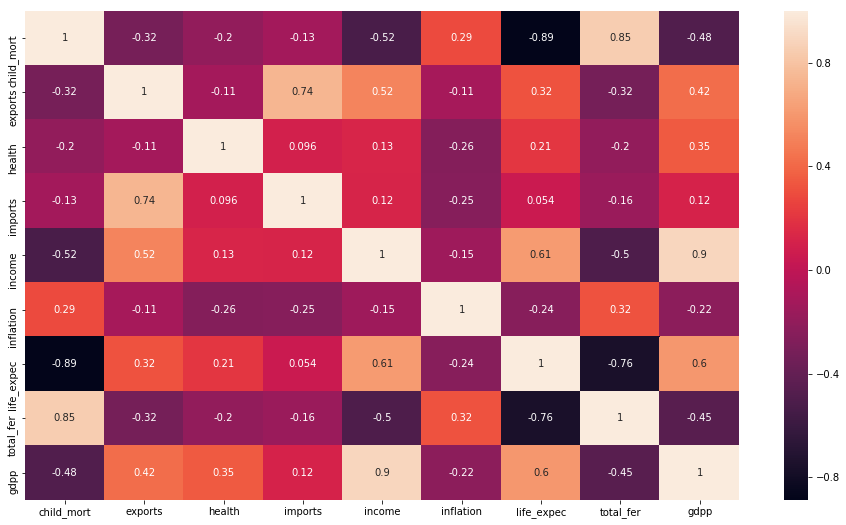

In [325]:
# Let's try to look at the correlation also, in order to get some insights which we can contradict later in this notebook.
plt.figure(figsize=(16,9))
sns.heatmap(countries.corr(),annot=True);
plt.savefig('Correlation_before_outlier_treatment.jpg');

### We deduce some pairs of correlation:

1. Child_Mort is correlated with Total_fer with value of 0.85
2. Exports is correlated with Imports with value of 0.74
3. Income is correlated with GDPP with value of 0.9
4. Life_Expec is correlated with Income with value of 0.61
5. Life_Expec is correlated with GDPP with value of 0.6

#### This indicates that we need PCA to reduce the multicollinearity and Dimensions to a more proper Principal Components.

In [326]:
# We will try to treat the outliers and let's see what is the final dataframe which we get
outlier_treated_df = countries.copy()
outlier_treated_df.drop('country',inplace=True,axis=1)
# removing (statistical) outliers
from scipy import stats
outlier_treated_df = outlier_treated_df[(np.abs(stats.zscore(outlier_treated_df)) < 3).all(axis=1)]

In [327]:
outlier_treated_df.head()
print(outlier_treated_df.shape)

(153, 9)


## Ok, we find that we got around 14 rows got dropped which were outliers. 

### We still have a sophisticated data frame. So we will consider the treated data frame.

Also note that the variables are being scaled so their is no need to convert the %variables by multiplying it into 100.

# The approach we are going to take is:

## 1. We will apply K Means on the following Outlier Treated Data Frame, once without PCA and then with PCA, in order to find the optimum number of Clusters we can use. We will use the Elbow Curve method for this.

## 2. Then we will apply PCA on the Outlier Treated Data Frame and perform both types of Clustering -> KMeans and Hierarchical Clustering Both.

## 3. Plot some inferences based on GDPP,Child_Morth and Income for the formed clusters.

## 4. Provide final outputs for our performed analysis.

Let's Scale our Data Set

In [328]:
scaling = StandardScaler()
countries_y = countries.pop('country')
scaled_df = outlier_treated_df.copy()

###### Woah Woah Woah! Wait!

We will perform the Hopkins Test analysis as the part of process is to check wether the data set is fit for **Clustering** or not!
Let's do that!

In [329]:
def lets_see_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HopScore = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HopScore):
        print(ujd, wjd)
        HopScore = 0
 
    return HopScore

#First convert the numpy array that you have to a dataframe
hopkins_scaling = pd.DataFrame(scaled_df)
hopkins_scaling.columns = cols

lets_see_hopkins(hopkins_scaling)

0.8454587734068997

In [330]:
df_scaled = scaling.fit_transform(scaled_df)
df_scaled.shape

(153, 9)

In [331]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = cols
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


Now we will look for the optimum number of Clusters using the Elbow Curve Method:

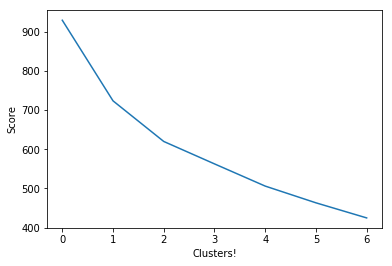

In [332]:
sum_of_squared_distances = []
clusters_n = [2,3,4,5,6,7,8]
for i in clusters_n:
    kmeans = KMeans(n_clusters= i , max_iter= 50)
    kmeans.fit(df_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)
    
# We will plot the curve now with calculated sum of squared distances
plt.plot(sum_of_squared_distances);
plt.ylabel('Score');
plt.xlabel('Clusters!')
plt.savefig('Elbow_Curve_for_optimum_K.jpg');

Ok, to be more sure, we have to see the Silhoutte Scores are from the above graph, we can only get clusters = 2, so let's confirm this thing!

In [333]:
for i in clusters_n:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2821703661273351
For n_clusters=3, the silhouette score is 0.27355544564743006
For n_clusters=4, the silhouette score is 0.25026467346133763
For n_clusters=5, the silhouette score is 0.23612548854601798
For n_clusters=6, the silhouette score is 0.2383162467170808
For n_clusters=7, the silhouette score is 0.21316406103822447
For n_clusters=8, the silhouette score is 0.2223387271097112


### We are choosing *K=3* as according to Elbow Curve and Silhoutte Score, after 3 Clusters, the drop is *Insignificant*. Hence we take *k=3*

In [334]:
# Final Model without PCA, we'll build with K=3

kmeans_3 = KMeans(n_clusters= 3 , max_iter=100)
kmeans_3.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [335]:
kmeans_3.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 1])

In [336]:
outlier_treated_df['cluster id without pca (KMeans)'] = kmeans_3.labels_
outlier_treated_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans)
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


Now let's MAP the countries

In [337]:
df_proper = pd.concat([outlier_treated_df,countries_y],axis=1)

In [338]:
df_proper.isnull().sum()
# We are getting this because Outlier Treatment was performed for the NUMERICAL COLUMMNS. Let's drop these and then figure out.

child_mort                         14
exports                            14
health                             14
imports                            14
income                             14
inflation                          14
life_expec                         14
total_fer                          14
gdpp                               14
cluster id without pca (KMeans)    14
country                             0
dtype: int64

In [339]:
df_proper.dropna(axis=0,inplace=True)
df_proper.isnull().sum()

child_mort                         0
exports                            0
health                             0
imports                            0
income                             0
inflation                          0
life_expec                         0
total_fer                          0
gdpp                               0
cluster id without pca (KMeans)    0
country                            0
dtype: int64

In [340]:
df_proper.shape

(153, 11)

# Please Note:

In terms of evaluating accuracy. You should remember that k-means is not a classification tool, thus analyzing accuracy is not a very good idea. You can do this, but this is not what k-means is for. It is supposed to find a grouping of data which maximizes between-clusters distances, it does not use your labeling to train.

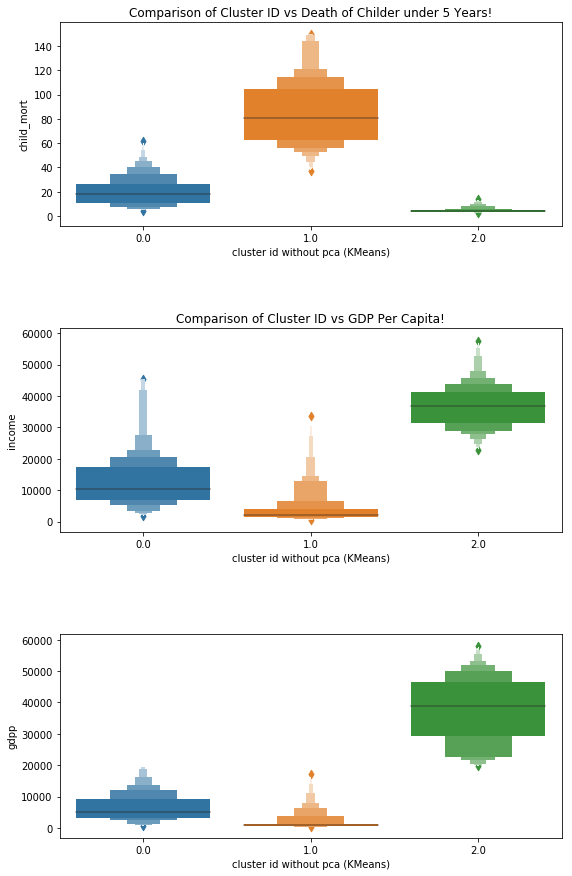

In [341]:
plt.figure(figsize=(9,15))
plt.subplots_adjust(hspace=0.5)
plt.subplot(3,1,1)
plt.title('Comparison of Cluster ID vs Death of Childer under 5 Years!');
sns.boxenplot(x = 'cluster id without pca (KMeans)' , y = 'child_mort',data = df_proper);
plt.subplot(3,1,2)
plt.title('Comparison of Cluster ID vs Income!');
sns.boxenplot(x = 'cluster id without pca (KMeans)' , y = 'income',data = df_proper);
plt.title('Comparison of Cluster ID vs GDP Per Capita!');
plt.subplot(3,1,3)
sns.boxenplot(x = 'cluster id without pca (KMeans)' , y = 'gdpp',data = df_proper);
plt.savefig('BoxPlot_on_non_PCA_DF_but_with_KMEANS.jpg');

### The inferences we can deduce is:

1. Cluster 1 has Population which earns very less income maybe around less than 5k, which leads to low contribution towards the GDP Per Capita. This is the reason becasuse of which childerns die withing 5 years of age.
2. Cluster 3 seems to be the Middle Class Population where Income standard is around 15K, contribution towards GDP Per Capita is not that too low, but still a significant low children die in this cluster.
3. Cluster 2 is definitely for the Upper Class Population where Income is Comparatively high,so is theri GDP Per Capita contribution and hence the Childern deaths are pretty/almost low.

# Next we plan onto apply the whole concept using the PCA and trying out both types of Clustering.

## Please Note: The above KMEANS without PCA was to find out the number of Optimum clusters, which we will do again after applying PCA and for fun!

### Let's Begin!

In [342]:
# We already have scaled dataframe, let's see it
df_scaled.head()
# But for application of PCA, we need a Numpy array, so we will scale again!

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


In [343]:
df_scaled_pca = scaling.fit_transform(scaled_df)
df_scaled_pca

array([[ 1.46183636, -1.41330427,  0.31809414, ..., -1.73823548,
         1.94438462, -0.72205486],
       [-0.56911214, -0.52600184, -0.08875965, ...,  0.71229884,
        -0.88698624, -0.46758977],
       [-0.27385196, -0.01333821, -1.02886841, ...,  0.73668227,
        -0.04504383, -0.44097058],
       ...,
       [-0.3842296 ,  1.64295967,  0.02579142, ...,  0.32216403,
        -0.6832905 , -0.66759343],
       [ 0.5263859 , -0.42741268, -0.62991469, ..., -0.36057191,
         1.16355093, -0.66759343],
       [ 1.26591606, -0.08235062, -0.34946208, ..., -2.25028743,
         1.65921057, -0.65680187]])

In [344]:
# Now let;s apply PCA

pca = PCA(random_state= 42)
pca.fit(df_scaled_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [345]:
pca.components_

array([[-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
        -0.22650995,  0.42715413, -0.40550525,  0.39482635],
       [ 0.03459073,  0.6327697 , -0.12933969,  0.7257587 , -0.07067406,
        -0.06317055, -0.14387869,  0.01853034, -0.15786626],
       [ 0.18299915, -0.25554275,  0.66457406,  0.25152297, -0.12332053,
        -0.5567656 , -0.18244321,  0.17127257,  0.09203817],
       [ 0.34760292,  0.26667437,  0.15444884, -0.08860929,  0.45993894,
         0.30990123, -0.19006785,  0.42255347,  0.50407451],
       [-0.22366393, -0.08811952,  0.57689406,  0.2178802 , -0.13508527,
         0.71277143,  0.05368612, -0.0894036 , -0.15736745],
       [ 0.05354957,  0.29421054,  0.19869989, -0.3552151 ,  0.04942437,
        -0.03553489, -0.63615054, -0.57141714, -0.10001314],
       [ 0.00091456, -0.56038917, -0.29999471,  0.46315184,  0.24684036,
         0.13004423, -0.37448883, -0.29824888,  0.27280168],
       [-0.77430348,  0.00447314, -0.03962214, -0.07430007,  0

In [346]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

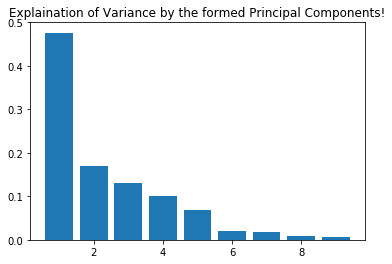

In [347]:
# Let's plot this variance.
plt.title('Explaination of Variance by the formed Principal Components!');
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_);
plt.savefig('Scree_Plot_Variance_looking.jpg');

### Making the Scree Plot for choosing the number of PC's

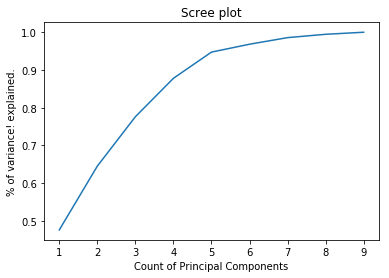

In [348]:
#This is know as Scree plot in order to get the number of PRINCIPAL COMPONENTS that are to be choosen.
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cum)+1),var_cum);

# nahh...we can't see what is more for 90% variance!. Let's make a more proper plot for this!
plt.title('Scree plot');
plt.ylabel('% of variance! explained.');
plt.xlabel('Count of Principal Components');
plt.savefig('Scree_Plot.jpg');

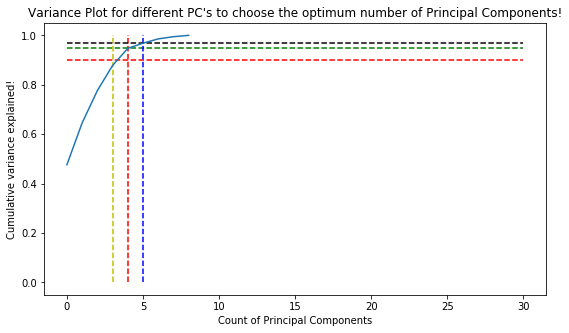

In [349]:
fig = plt.figure(figsize=[9,5])
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
# 95% of variacne is explained by 4 PC's.
plt.vlines(x=3, ymax=1, ymin=0, colors="y", linestyles="--")
plt.hlines(y=0.90, xmax=30, xmin=0, colors="r", linestyles="--")
# 90% of the variacen is explained by 3 PC's 
plt.vlines(x=5, ymax=1, ymin=0, colors="b", linestyles="--")
plt.hlines(y=0.97, xmax=30, xmin=0, colors="black", linestyles="--")
# 97% of the variacen is explained by 5 PC's 
plt.plot(var_cum)
plt.title("Variance Plot for different PC's to choose the optimum number of Principal Components!");
plt.ylabel("Cumulative variance explained!");
plt.savefig('Cutting_the_scree_plot_for_optimum_PCs.jpg');
plt.xlabel('Count of Principal Components');
plt.show()

We see that **95%** of **Variance** is explained by **4 Principal Components**. Hence we will proceed with 4 PC's.
Let's build the Dataframe of these PC's.

Also, we choose the number of ***Principal Components*** based on the maximum variance explained by the number of PC's.

In [350]:
PC_4 = PCA(n_components= 4 , random_state= 42)
DF_with_4_PCs = PC_4.fit_transform(df_scaled_pca)
DF_with_4_PCs.shape

(153, 4)

In [351]:
df_with_4_PCs = pd.DataFrame(DF_with_4_PCs, columns=["PC1", "PC2","PC3","PC4"])
df_with_4_PCs.head()

,PC1,PC2,PC3,PC4
0,-3.130806,-0.471117,1.336274,0.641322
1,0.551781,-0.230632,-0.071234,-1.377036
2,-0.356257,-0.542354,-1.818159,-0.216783
3,-3.454323,1.114470,-1.553986,2.168457
4,1.308957,0.612033,-0.065287,-0.687559


 Next we have to go on applying the Clustering Algorithms over the Transformed PCA dataset!

In [352]:
# Let's plot the Correlation Matrix for the created PC dataframe!
corrmat = np.corrcoef(df_with_4_PCs.transpose())
corrmat.shape

(4, 4)

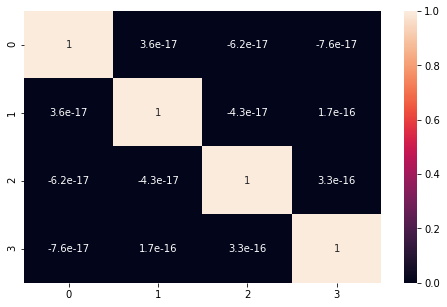

In [353]:
plt.figure(figsize=(8,5))
sns.heatmap(corrmat,annot=True);
plt.savefig('Correlation_on_selected_PCs.jpg');

## We will theoretical look at PCA as which variable is explaining how much variance.

In [354]:
# Let' form our Pivot Data Frame!
pc_df_with_variables = pd.DataFrame(PC_4.components_,columns=cols,index = ['PC-1','PC-2','PC-3','PC-4'])
pc_df_with_variables

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
PC-1,-0.423220,0.203604,0.217542,0.082910,0.413693,-0.226510,0.427154,-0.405505,0.394826
PC-2,0.034591,0.632770,-0.129340,0.725759,-0.070674,-0.063171,-0.143879,0.018530,-0.157866
PC-3,0.182999,-0.255543,0.664574,0.251523,-0.123321,-0.556766,-0.182443,0.171273,0.092038
PC-4,0.347603,0.266674,0.154449,-0.088609,0.459939,0.309901,-0.190068,0.422553,0.504075


The highest variance explained is by *Imports* for the component *PC-2*

## Next we will go onto apply the K Means and Clustering Algorithms on the PCA dataframe!

#### The inferential approach we are taking is in following steps:
1. Apply KMeans and map the clusters to the **df_proper** dataframe!
2. Apply Hierarchical Clustering and map the clusters to **df_proper** dataframe!
3. Plot proper box plots/boxen plots or violin plots paralelly for both the clustered ID's and provide the inferences.

In [355]:
# Applying KMeans on PCA dataframe with 3 clusters. Reason already stated for choosing 3 Clusters and so the reason stated for choosing 4 PC's.
pca_kmeans = KMeans(n_clusters=3,random_state=42)
pca_kmeans.fit(df_with_4_PCs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [356]:
pca_kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0])

In [357]:
# Mapping KMeans cluster ID's to the dataframe!
df_proper['cluster id with pca (KMeans)'] = pca_kmeans.labels_
df_proper.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans)
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,Afghanistan,0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,Albania,2
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,Algeria,2
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,Angola,0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,Antigua and Barbuda,2


In [358]:
df_proper.shape

(153, 12)

In [359]:
df_proper.isnull().sum()

child_mort                         0
exports                            0
health                             0
imports                            0
income                             0
inflation                          0
life_expec                         0
total_fer                          0
gdpp                               0
cluster id without pca (KMeans)    0
country                            0
cluster id with pca (KMeans)       0
dtype: int64

### This step is performed as in the problem statement, it is asked that we should plot the Principal Components on X-Y axis and visualize, so instead of going for each PC, we plot a combined ***Pairplot***

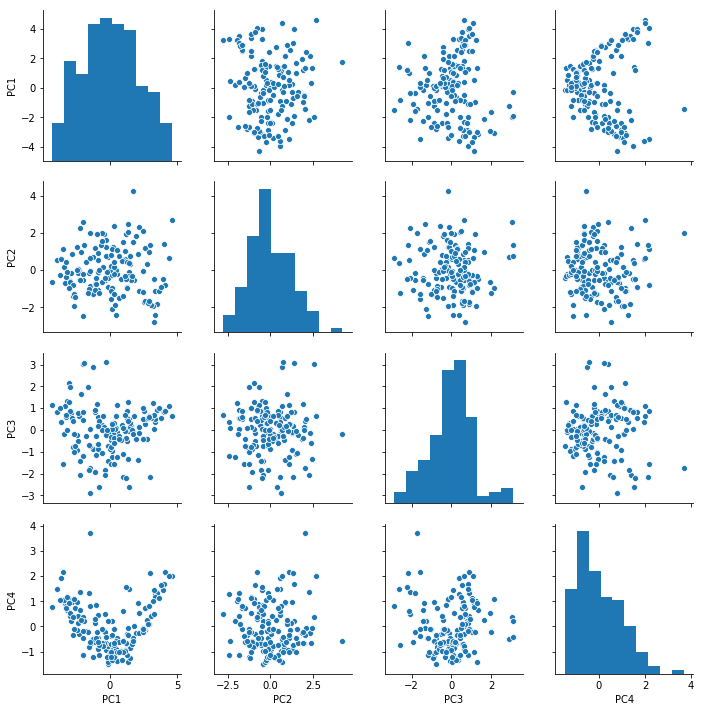

In [360]:
# paiplot for the PCA dataframe!
sns.pairplot(df_with_4_PCs);
plt.savefig('Pairplot_on_selected_PCs.jpg');

## Let's apply Hierarchical Clustering

In [361]:
# our scaled dataframe:
df_with_4_PCs.head()

,PC1,PC2,PC3,PC4
0,-3.130806,-0.471117,1.336274,0.641322
1,0.551781,-0.230632,-0.071234,-1.377036
2,-0.356257,-0.542354,-1.818159,-0.216783
3,-3.454323,1.114470,-1.553986,2.168457
4,1.308957,0.612033,-0.065287,-0.687559


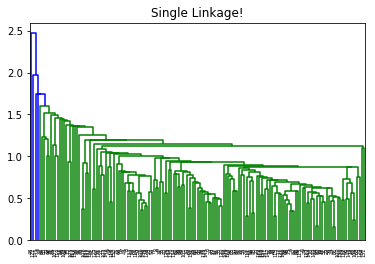

In [362]:
# Single Linkage: We merge in each step the two clusters, whose two closest members have the smallest distance.
mergings = linkage(df_with_4_PCs,metric='euclidean',method='single')
dendrogram(mergings)
plt.title("Single Linkage!");
plt.savefig('Single_Linkage_Dendogram.jpg');
plt.show()

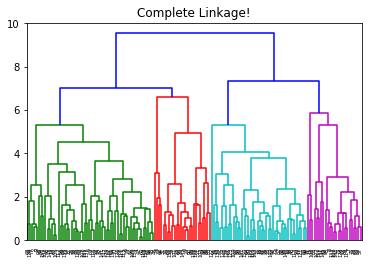

In [363]:
# Complete Linkage: We merge in the members of the clusters in each step, which provide the smallest maximum pairwise distance.
mergings = linkage(df_with_4_PCs,metric='euclidean',method='complete')
dendrogram(mergings)
plt.title("Complete Linkage!");
plt.savefig('Complete_Linkage_Dendogram.jpg');
plt.show()

In [364]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1,
       1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 0])

In [365]:
# assign cluster labels
df_proper['cluster id with pca (Hierarchical)'] = cluster_labels
df_proper.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,Afghanistan,0,0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,Albania,2,0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,Algeria,2,0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,Angola,0,0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,Antigua and Barbuda,2,1


In [366]:
df_proper_final = pd.concat([df_proper,df_with_4_PCs],axis=1)
df_proper_final.head(50)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical),PC1,PC2,PC3,PC4
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,Afghanistan,0.0,0.0,-3.130806,-0.471117,1.336274,0.641322
1,16.6,28.00,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,0.0,Albania,2.0,0.0,0.551781,-0.230632,-0.071234,-1.377036
2,27.3,38.40,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,0.0,Algeria,2.0,0.0,-0.356257,-0.542354,-1.818159,-0.216783
3,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1.0,Angola,0.0,0.0,-3.454323,1.114470,-1.553986,2.168457
4,10.3,45.50,6.03,58.9,19100.0,1.440,76.8,2.13,12200.0,0.0,Antigua and Barbuda,2.0,1.0,1.308957,0.612033,-0.065287,-0.687559
5,14.5,18.90,8.10,16.0,18700.0,20.900,75.8,2.37,10300.0,0.0,Argentina,2.0,0.0,0.163504,-2.084404,-1.254095,0.208595
6,18.1,20.80,4.40,45.3,6700.0,7.770,73.3,1.69,3220.0,0.0,Armenia,2.0,0.0,-0.136310,-0.419282,-0.749083,-1.488122
7,4.8,19.80,8.73,20.9,41400.0,1.160,82.0,1.93,51900.0,2.0,Australia,1.0,2.0,3.335259,-2.438192,0.379190,1.279930
8,4.3,51.30,11.00,47.8,43200.0,0.873,80.5,1.44,46900.0,2.0,Austria,1.0,2.0,3.949081,-0.478883,0.880089,1.464752
9,39.2,54.30,5.88,20.7,16000.0,13.800,69.1,1.92,5840.0,0.0,Azerbaijan,2.0,0.0,-0.143114,-0.422884,-1.433313,0.207409


In [367]:
df_proper_final.shape

(165, 17)

In [368]:
df_proper_final.isna().sum()

child_mort                            12
exports                               12
health                                12
imports                               12
income                                12
inflation                             12
life_expec                            12
total_fer                             12
gdpp                                  12
cluster id without pca (KMeans)       12
country                               12
cluster id with pca (KMeans)          12
cluster id with pca (Hierarchical)    12
PC1                                   12
PC2                                   12
PC3                                   12
PC4                                   12
dtype: int64

In [369]:
df_proper_final.dropna(axis=0,inplace=True)
df_proper_final.shape

(141, 17)

## Now let's start plotting the KMEANS and Hierarchical Inferences in order to find the countries which need aid most!

In [370]:
# Getting Groupby for KMEANS Clusters
cluster_0_for_KMEANS = df_proper.groupby('cluster id with pca (KMeans)').get_group(0)
cluster_1_for_KMEANS = df_proper.groupby('cluster id with pca (KMeans)').get_group(1)
cluster_2_for_KMEANS = df_proper.groupby('cluster id with pca (KMeans)').get_group(2)

In [371]:
# Getting Groupby for Heirarchical Clusters
cluster_0_for_HC = df_proper.groupby('cluster id with pca (Hierarchical)').get_group(0)
cluster_1_for_HC = df_proper.groupby('cluster id with pca (Hierarchical)').get_group(1)
cluster_2_for_HC = df_proper.groupby('cluster id with pca (Hierarchical)').get_group(2)

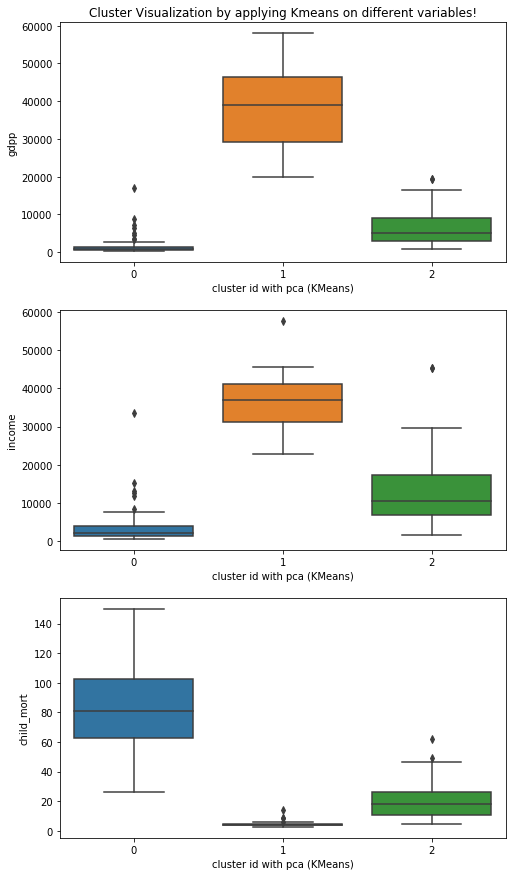

In [372]:
# Let's visualize the Clusters!
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.title('Cluster Visualization by applying Kmeans on different variables!');
sns.boxplot(y = 'gdpp',x = 'cluster id with pca (KMeans)',data = df_proper);
plt.subplot(3,1,2)
sns.boxplot(y = 'income',x = 'cluster id with pca (KMeans)',data = df_proper);
plt.subplot(3,1,3)
sns.boxplot(y = 'child_mort',x = 'cluster id with pca (KMeans)',data = df_proper);
plt.savefig('KMEANS Cluster Visualization.png');

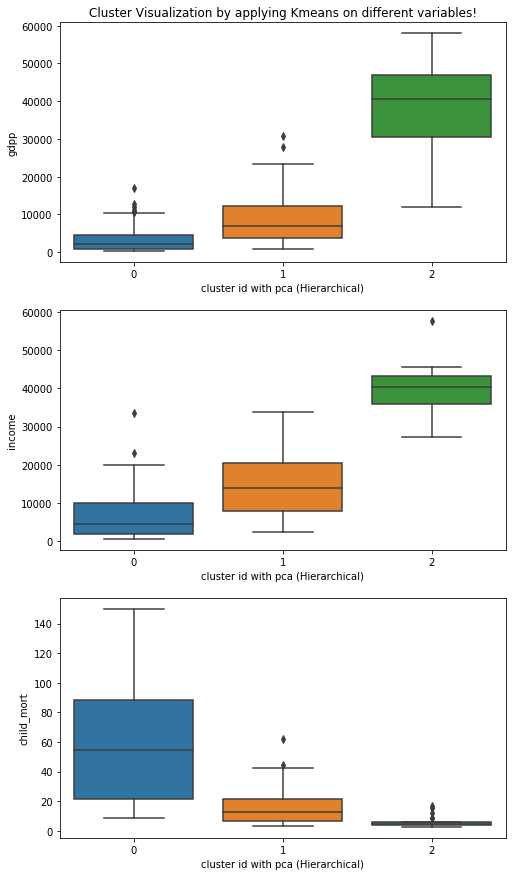

In [373]:
# Let's visualize the Clusters for hierarchical CLustering!
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
plt.title('Cluster Visualization by applying Kmeans on different variables!');
sns.boxplot(y = 'gdpp',x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.subplot(3,1,2)
sns.boxplot(y = 'income',x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.subplot(3,1,3)
sns.boxplot(y = 'child_mort',x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.savefig('Hierarchical Cluster Visualization.png');

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


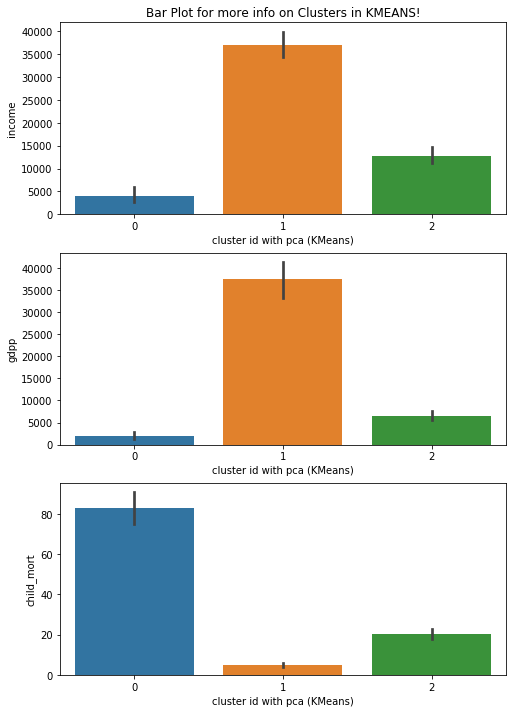

In [374]:
plt.figure(figsize=(8,12))
plt.subplot(311)
plt.title('Bar Plot for more info on Clusters in KMEANS!')
sns.barplot(y = 'income' , x = 'cluster id with pca (KMeans)',data = df_proper);
plt.subplot(312)
sns.barplot(y = 'gdpp' , x = 'cluster id with pca (KMeans)',data = df_proper);
plt.subplot(313)
sns.barplot(y = 'child_mort' , x = 'cluster id with pca (KMeans)',data = df_proper);
plt.savefig('bar plot KMEANS Cluster Visualization.png');

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


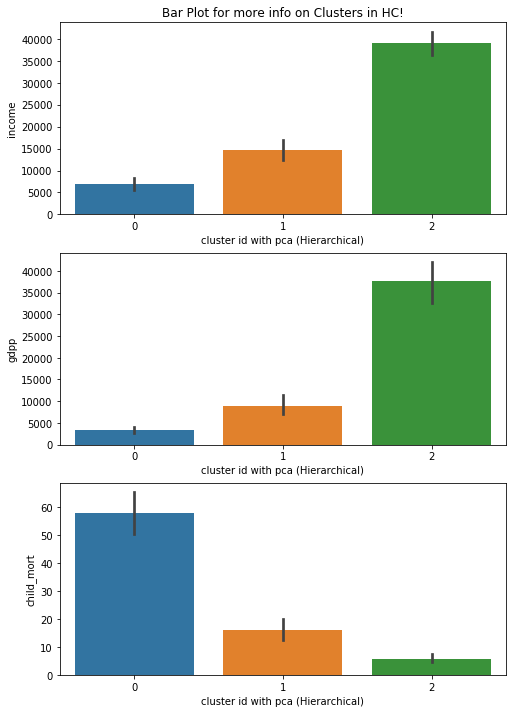

In [375]:
plt.figure(figsize=(8,12))
plt.subplot(311)
plt.title('Bar Plot for more info on Clusters in HC!')
sns.barplot(y = 'income' , x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.subplot(312)
sns.barplot(y = 'gdpp' , x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.subplot(313)
sns.barplot(y = 'child_mort' , x = 'cluster id with pca (Hierarchical)',data = df_proper);
plt.savefig('Bar plot Hierarchical Cluster Visualization.png');

In [376]:
df_proper_final.isnull().sum()

child_mort                            0
exports                               0
health                                0
imports                               0
income                                0
inflation                             0
life_expec                            0
total_fer                             0
gdpp                                  0
cluster id without pca (KMeans)       0
country                               0
cluster id with pca (KMeans)          0
cluster id with pca (Hierarchical)    0
PC1                                   0
PC2                                   0
PC3                                   0
PC4                                   0
dtype: int64

We need to clean the data, as the concatenated data has the null values and the outlier values, which are turned into NaN

In [377]:
df_proper_final['cluster id with pca (KMeans)'].value_counts()

2.0    71
0.0    45
1.0    25
Name: cluster id with pca (KMeans), dtype: int64

We will look at all the PC's on **X** and **Y** axis as given in the problem statement!based on the cluster ID's!

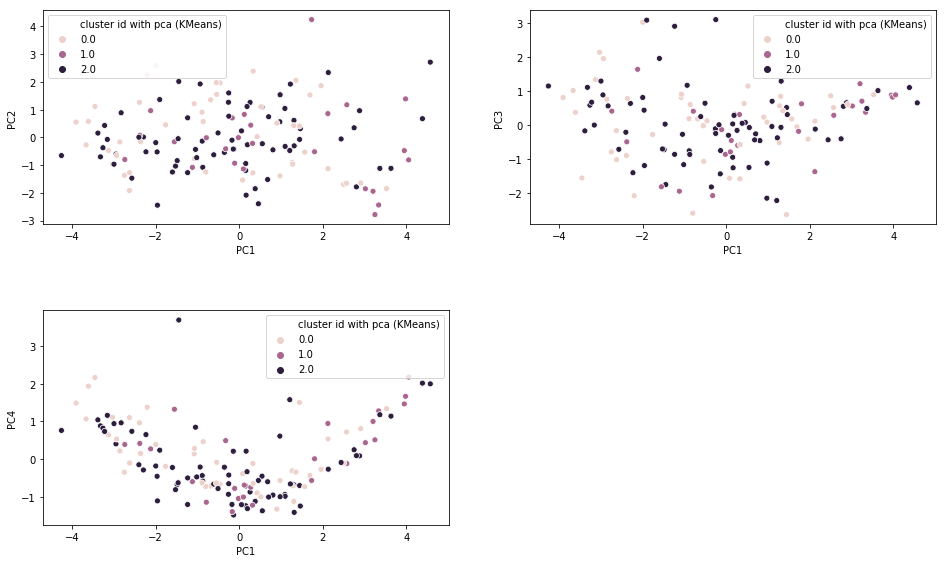

In [378]:
def plot_scatter_plot_KMEANS_Cluster(PC_1,list_PC):
    x=1
    hue = 'cluster id with pca (KMeans)'
    plt.figure(figsize=(16,15))
    plt.subplots_adjust(hspace = 0.4)
    plt.title("Plotting PC1 with respect to all other PC's!")
    for i in list_PC:
        plt.subplot(3,2,x)
        sns.scatterplot(x = PC_1,y = i,data=df_proper_final,legend = 'full',hue=hue)
        x +=1

# Visualizing PC1 with other PC's
plot_scatter_plot_KMEANS_Cluster('PC1',['PC2','PC3','PC4'])

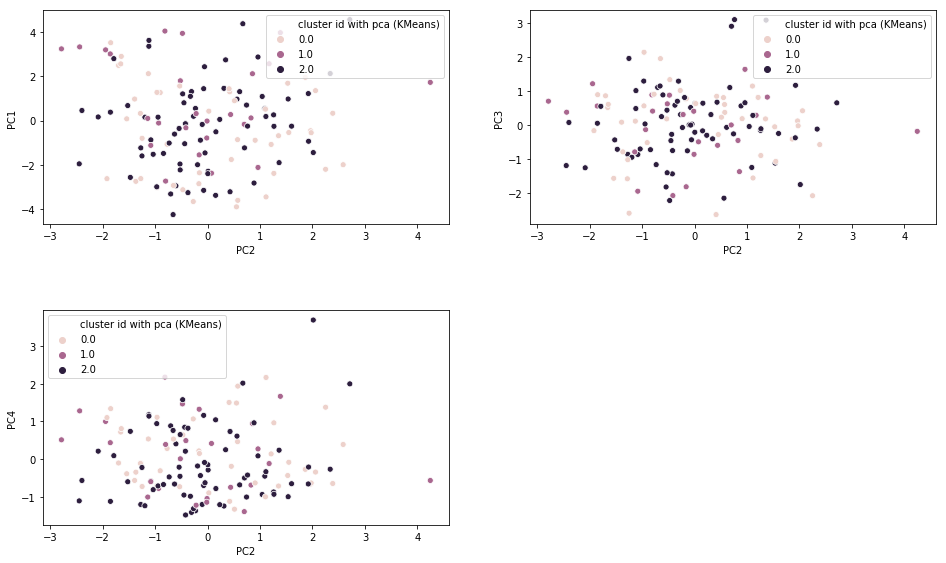

In [379]:
# V isualizing PC2 with other PC's
plot_scatter_plot_KMEANS_Cluster('PC2',['PC1','PC3','PC4'])

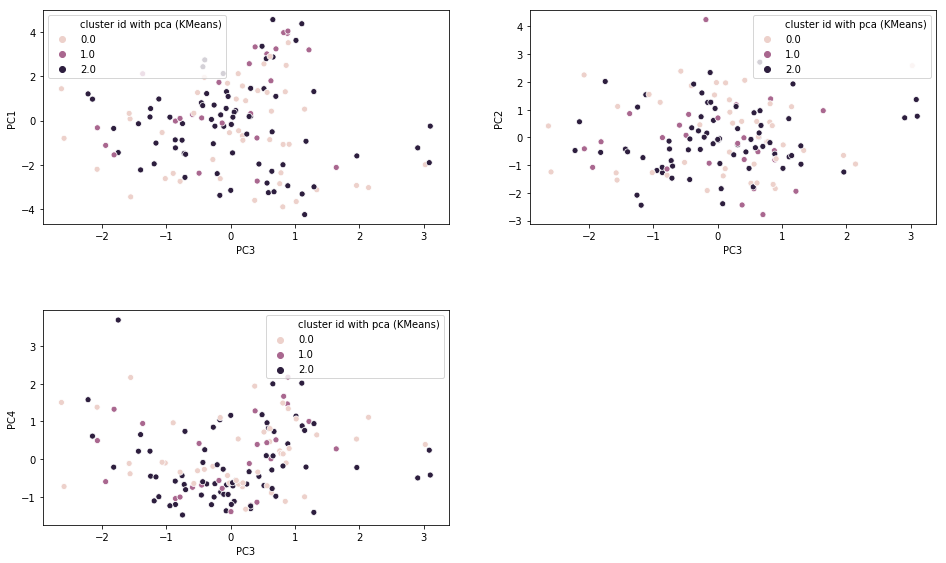

In [380]:
# Visualizing PC3 with other PC's
plot_scatter_plot_KMEANS_Cluster('PC3',['PC1','PC2','PC4'])

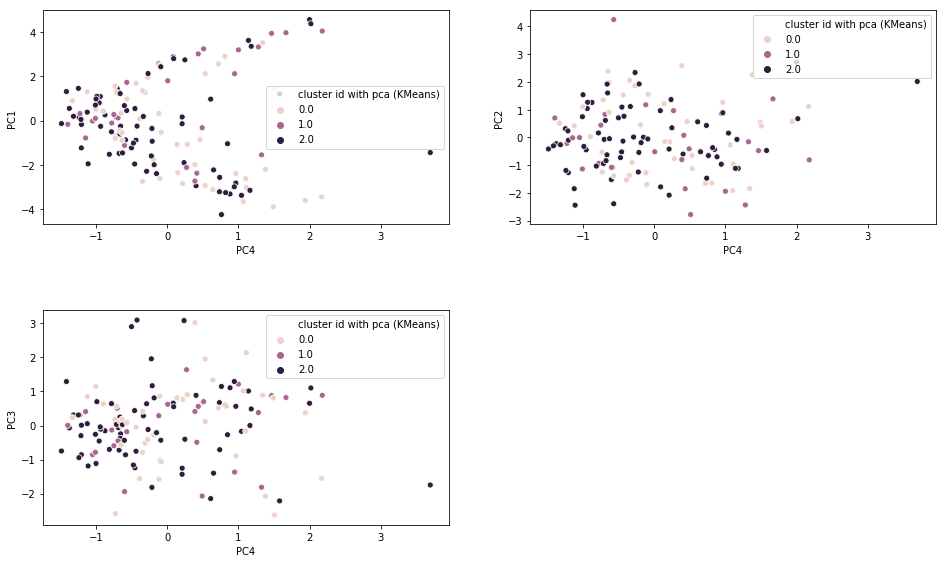

In [381]:
# Visualizing PC4 with other PC's
plot_scatter_plot_KMEANS_Cluster('PC4',['PC1','PC2','PC3'])

### Please Note:

We will choose the model with K=3, because of the following reasons:
1. Technical Aspect : The elbow curve shows insignificant drop after K=3, and the Silhoutte score is most suitable for K=3.
2. Business Aspect : We are aiming to form clusters of Loweer Class People,Middle Class People and Upper Class People.

##### Hence justified the reason for choosing the number of Clusters!

## Now as stated in the Evaluation Rubics, we need to perform atleast 2 iterations on different K. This we will do using 4 clusters, or K=4 as we have already seen model where K=3.

In [382]:
kmeans_cluster_4 = KMeans(n_clusters=4,random_state=42)
kmeans_cluster_4.fit(df_with_4_PCs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [383]:
len(kmeans_cluster_4.labels_)

153

In [384]:
df_proper['cluster id with K=4'] = kmeans_cluster_4.labels_
df_proper.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical),cluster id with K=4
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1.0,Afghanistan,0,0,2
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,Albania,2,0,0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,Algeria,2,0,3
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1.0,Angola,0,0,2
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,Antigua and Barbuda,2,1,0


In [385]:
df_proper.isnull().sum()

child_mort                            0
exports                               0
health                                0
imports                               0
income                                0
inflation                             0
life_expec                            0
total_fer                             0
gdpp                                  0
cluster id without pca (KMeans)       0
country                               0
cluster id with pca (KMeans)          0
cluster id with pca (Hierarchical)    0
cluster id with K=4                   0
dtype: int64

### Ok now we will point out what all we have done:

1. Exploratory Data Visualised by useing the basic Data Manipulation techniques.
2. Outlier Analysis done and treatment performed.
3. Scaled the dataset to bing them on one measuring scale and performed PCA analysis.
4. Performed **Hopkins test** in order to see if the dataset is suitable for Clustering or not!
5. Performed **KMEANS** on Non PCA dataframe for fun and to get some insight.
6. Plotted **BoxPLots** visualisation for the variables **gdpp/income and child_mort** over the cluster ID's.
7. Did the Elbow curve mehtod and Silhoutte Analysis to select the number of **Clusters** logically we need. **K=3** optimum value chosen and reason stated.
8. After performing the PCA analysis, we used the **Scree Plot** in order to find the 95% variance explained by how many Principal Components! **95% variance is explained by top 4 PC's**. Logically reason explained and plotted the same.
9. Formulated a **Pairplot** and **Individual Scatter Plots** for the selected principal components selected over the cluster ID's obtained from **KMEANS**.
10. Created 2 separate dataframes. One containing the PCA components with orignial dataframe and one with the cluster ID's only.
11. Then as per the problem statement, performed **KMEANS** suing two different **K**, but the optimum value of K is taken 3 as the business value also suits the **K to be 3**.

##### The next step to perform is the Visualization for the formed clusters from K=3 by KMeans and Hierarchical Clustering.

Since it is also mentioned to choose the best **Clustering Algorithm**, we will first look at the differences betweeen these 2 algorithms:

1. Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
2. In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
3. K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
4. K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

Since we have already chosen the **K=3** from our Silhoutte Score and Elbow analysis, we will go with **K Means** as it is **Linear in Nature** and consumes less time.
But we will look at both of them and finally will give the Countries in dire need.!

In [386]:
cluster_0_for_KMEANS.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,Afghanistan,0,0
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1.0,Angola,0,0
17,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,Benin,0,0
21,52.5,43.6,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,1.0,Botswana,0,0
25,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1.0,Burkina Faso,0,0


In [387]:
cluster_kmeans_list = [cluster_0_for_KMEANS,cluster_1_for_KMEANS,cluster_2_for_KMEANS]
cluster_HC_list = [cluster_0_for_HC,cluster_1_for_HC,cluster_2_for_HC]
# We will write a function for plotting all the Scatter Plots for all clusters over the mentioned variables for each clustering algorithm!
def plot_variable(variable,variables_list,cluster):
    x=1
    for j in variables_list:
        plt.subplot(2,1,x)
        plt.subplots_adjust(hspace=0.5)
        sns.scatterplot(x = variable,y = j,data = cluster)
        x+=1

## Plotting variables for KMEANS Algorithm!

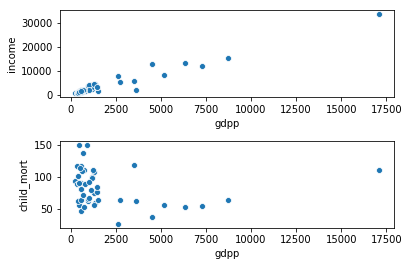

In [388]:
# Cluster 0 => Lower Class People where Children Deaths are most counted!
plot_variable('gdpp',['income','child_mort'],cluster_kmeans_list[0])

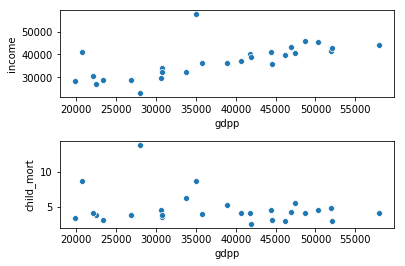

In [389]:
# Cluster 1 => Higher Class People where Children Deaths are lowest and income is comparatively High!
plot_variable('gdpp',['income','child_mort'],cluster_kmeans_list[1])

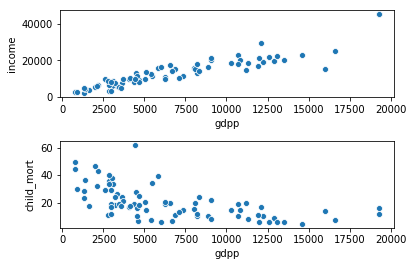

In [390]:
# Cluster 2 => Middle Class People where Children Deaths are not that high but Income is clustered and so is the GDP per capita!
plot_variable('gdpp',['income','child_mort'],cluster_kmeans_list[2])

## Plotting Variables for Hierarchical CLustering!

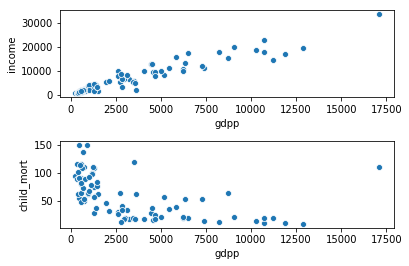

In [391]:
# Cluster 0 => Lower Class People where Children Deaths are most counted!
plot_variable('gdpp',['income','child_mort'],cluster_HC_list[0])

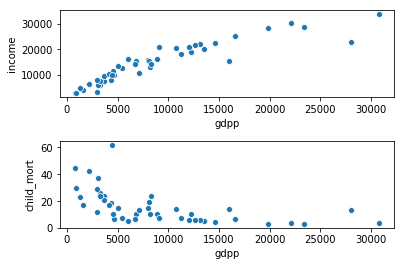

In [392]:
# Cluster 2 => Middle Class People where Children Deaths are not that high but Income is clustered and so is the GDP per capita!
plot_variable('gdpp',['income','child_mort'],cluster_HC_list[1])

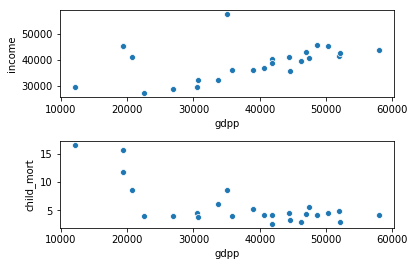

In [393]:
# Cluster 1 => Higher Class People where Children Deaths are lowest and income is comparatively High!
plot_variable('gdpp',['income','child_mort'],cluster_HC_list[2])

### So we have figured out that the countries that are in need to **DIRE** aid are in Cluster 0 for both the Algorithms!

Let's check them out!

In [394]:
# Cluster 0 for Kmeans!
cluster_0_for_KMEANS.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
0,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,Afghanistan,0,0
3,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1.0,Angola,0,0
17,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,Benin,0,0
21,52.5,43.6,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,1.0,Botswana,0,0
25,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1.0,Burkina Faso,0,0


## Bining is one way to find the countries, but we want to find the countries using a special criteria explained below: 

#### The approach:

The Technique we are using to find out the Countries is using the **Mean** metric. What we aim is to find the mean of all the 3 variables provided to us, then the countries are segmented based on the value of *high Child Mortality*,*low Income and low GDPP*.

##### Let's see this thing!

In [395]:
mean_income = cluster_0_for_KMEANS.income.mean()
mean_gdpp = cluster_0_for_KMEANS.gdpp.mean()
mean_child_mort = cluster_0_for_KMEANS.child_mort.mean()

In [396]:
criteria = (cluster_0_for_KMEANS.income < mean_income) & (cluster_0_for_KMEANS.gdpp < mean_gdpp)
criteria_2 = (criteria) & (cluster_0_for_KMEANS.child_mort > mean_child_mort)
df_we_need = cluster_0_for_KMEANS[criteria_2]
df_we_need.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,Afghanistan,0,0
17,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,Benin,0,0
25,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1.0,Burkina Faso,0,0
26,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1.0,Burundi,0,0
28,108.0,22.20,5.13,27.0,2660.0,1.910,57.3,5.11,1310.0,1.0,Cameroon,0,0


In [397]:
df_we_need.shape

(19, 13)

We repeat the process to filter out more countries!

In [398]:
mean_income = df_we_need.income.mean()
mean_gdpp = df_we_need.gdpp.mean()
mean_child_mort = df_we_need.child_mort.mean()

In [399]:
criteria = (df_we_need.income < mean_income) & (df_we_need.gdpp < mean_gdpp)
criteria_2 = (criteria) & (df_we_need.child_mort > mean_child_mort)
df_we_need_2 = df_we_need[criteria_2]
df_we_need_2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
25,116.0,19.2,6.74,29.6,1430.0,6.81,57.9,5.87,575.0,1.0,Burkina Faso,0,0
31,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.21,446.0,1.0,Central African Republic,0,0
37,116.0,41.1,7.91,49.6,609.0,20.80,57.5,6.54,334.0,1.0,"Congo, Dem. Rep.",0,0
63,109.0,30.3,4.93,43.2,1190.0,16.10,58.0,5.34,648.0,1.0,Guinea,0,0
64,114.0,14.9,8.50,35.2,1390.0,2.97,55.6,5.05,547.0,1.0,Guinea-Bissau,0,0


In [400]:
print('Top 5 Countries founded using KMEANS Algorithm are : \n ')
for i in df_we_need_2.country:
    print(i)

Top 5 Countries founded using KMEANS Algorithm are : 
 
Burkina Faso
Central African Republic
Congo, Dem. Rep.
Guinea
Guinea-Bissau


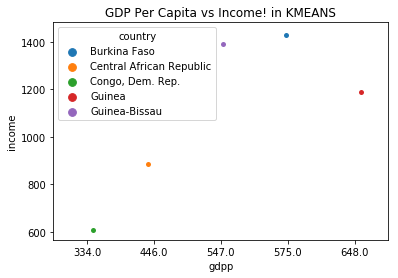

In [401]:
plt.title('GDP Per Capita vs Income! in KMEANS');
sns.catplot(x = 'gdpp',y='income',data=df_we_need_2,hue='country',ax=plt.gca());
plt.close();
plt.savefig('GDP vs Income on Final DF.jpg');

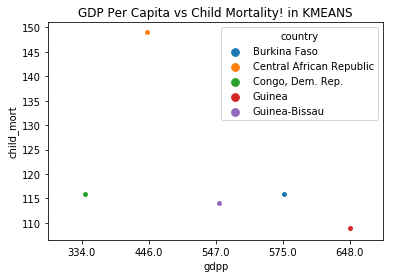

In [402]:
plt.title('GDP Per Capita vs Child Mortality! in KMEANS');
sns.catplot(x = 'gdpp',y='child_mort',data=df_we_need_2,hue='country',ax=plt.gca());
plt.close();
plt.savefig('GDP vs Child Mortality on Final DF.jpg');

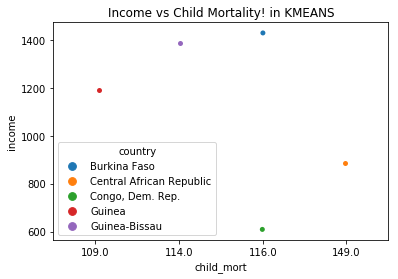

In [403]:
plt.title('Income vs Child Mortality! in KMEANS');
sns.catplot(x = 'child_mort',y='income',data=df_we_need_2,hue='country',ax=plt.gca());
plt.close();
plt.savefig('Income vs Child Mortality on Final DF.jpg');

## The same process is followed for Hierarchical Cluster 0.

In [404]:
mean_income_hc = cluster_0_for_HC.income.mean()
mean_gdpp_hc = cluster_0_for_HC.gdpp.mean()
mean_child_mort_hc = cluster_0_for_HC.child_mort.mean()
criteria = (cluster_0_for_HC.income < mean_income_hc) & (cluster_0_for_HC.gdpp < mean_gdpp_hc)
criteria_2 = (criteria) & (cluster_0_for_HC.child_mort > mean_child_mort_hc)
df_we_need = cluster_0_for_HC[criteria_2]
df_we_need.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
0,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1.0,Afghanistan,0,0
17,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,Benin,0,0
25,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1.0,Burkina Faso,0,0
26,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1.0,Burundi,0,0
28,108.0,22.20,5.13,27.0,2660.0,1.910,57.3,5.11,1310.0,1.0,Cameroon,0,0


In [405]:
mean_income_hc = df_we_need.income.mean()
mean_gdpp_hc = df_we_need.gdpp.mean()
mean_child_mort_hc = df_we_need.child_mort.mean()
criteria = (df_we_need.income < mean_income_hc) & (df_we_need.gdpp < mean_gdpp_hc)
criteria_2 = (criteria) & (df_we_need.child_mort > mean_child_mort_hc)
df_we_need_2_hc = df_we_need[criteria_2]
df_we_need_2_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster id without pca (KMeans),country,cluster id with pca (KMeans),cluster id with pca (Hierarchical)
17,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1.0,Benin,0,0
25,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1.0,Burkina Faso,0,0
26,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,1.0,Burundi,0,0
31,149.0,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0,1.0,Central African Republic,0,0
37,116.0,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0,1.0,"Congo, Dem. Rep.",0,0


In [406]:
df_we_need_2_hc.shape

(9, 13)

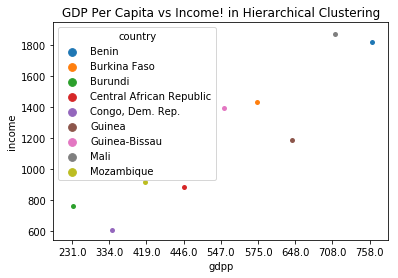

In [407]:
plt.title('GDP Per Capita vs Income! in Hierarchical Clustering');
sns.catplot(x = 'gdpp',y='income',data=df_we_need_2_hc,hue='country',ax=plt.gca());
plt.close();
plt.savefig('GDP vs Income on Final DF for Hierarchical Clustering.jpg');

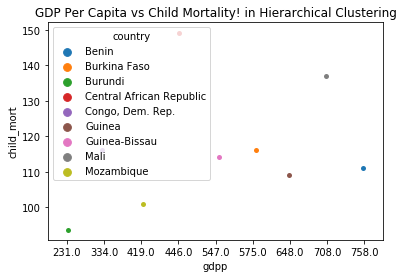

In [408]:
plt.title('GDP Per Capita vs Child Mortality! in Hierarchical Clustering');
sns.catplot(x = 'gdpp',y='child_mort',data=df_we_need_2_hc,hue='country',ax=plt.gca());
plt.close();
plt.savefig('GDP vs Child Mortality on Final DF for Hierarchical Clustering.jpg');

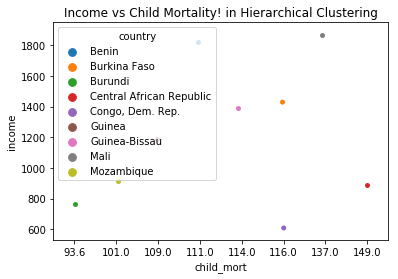

In [409]:
plt.title('Income vs Child Mortality! in Hierarchical Clustering');
sns.catplot(x = 'child_mort',y='income',data=df_we_need_2_hc,hue='country',ax=plt.gca());
plt.close();
plt.savefig('Income vs Child Mortality on Final DF for Hierarchical Clustering.jpg');

In [410]:
print('Top 5 Countries founded while Hierarchical Clustering are : \n ')
for i in df_we_need_2_hc.country:
    print(i)
    if i == 4:
        break

Top 5 Countries founded while Hierarchical Clustering are : 
 
Benin
Burkina Faso
Burundi
Central African Republic
Congo, Dem. Rep.
Guinea
Guinea-Bissau
Mali
Mozambique


## So the TOP 5 Countries which are similar in both the models are:

1. Burkina Faso
2. Central African Republic
3. Congo, Dem. Rep.
4. Guinea
5. Guinea-Bissau

The justification is because these countries have high **Child Mortality** and **Low  Income and GDP per Capita**. This leads to increase in Illiteracy,Corruption,Starvation and spreading uncurable/toxic diseases.



## Thank You!

Let's proceed to the Subjective Assignment!